
1. Load your zillow dataset.

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

 - Here is some sample code to get you started:


 - Modify and add to the code above as necessary for it to work with the zillow dataset.

3. Plot the residuals for the linear regression model that you made.

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?

8. Is your model better than the baseline model?

9. Create a file named evaluate.py that contains the following functions.

- `plot_residuals(y, yhat)`: creates a residual plot
- `regression_errors(y, yhat)`: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- `baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model
- `better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import wrangle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#. 1. Load Zillow dataset
df =wrangle.wrangle_zillow()

Using cached csv


In [3]:
df.columns

Index(['bedrooms', 'bathrooms', 'square_feet', 'garage', 'pool', 'lot_size',
       'zip', 'year_built', 'tax_value', 'tax_amount', 'fed_code', 'age'],
      dtype='object')

In [4]:
x = df['tax_value']
y = df['square_feet']
x.head()

parcel
14297519    1023282
17052889     464000
14186244     564778
12177905     145143
12095076     773303
Name: tax_value, dtype: int64

Text(0, 0.5, 'y=square_feet')

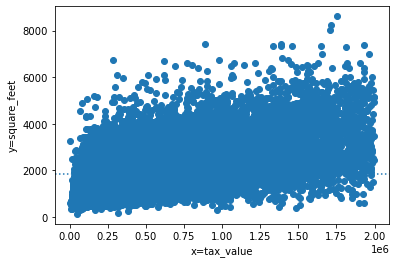

In [5]:
plt.scatter(x, y)
plt.axhline(y.mean(), ls=':')
plt.xlabel('x=tax_value')
plt.ylabel('y=square_feet')

Linear Regression:
- Does a set of independent variables do a good job in predicting an outcome (dependent) variable
- Is the model good enough compared to a baseline?
- Is the model with features/ind variable valuable/significant compared to a model with no features?

### Create a baseline prediction.
- Make a prediction just based on dependent variable i.e. model with no independent variable
    - mean or median of dependent variable (we will use mean for this lesson)

In [6]:
baseline = y.mean()
baseline

1842.4823781128039

In [7]:
df['baseline'] = y.mean()
df.head()

,bedrooms,bathrooms,square_feet,garage,pool,lot_size,zip,year_built,tax_value,tax_amount,fed_code,age,baseline
parcel,,,,,,,,,,,,,
14297519,4,3,3100,2,0,4506,96978,1998,1023282,11013.72,6059,19,1842.482378
17052889,2,1,1465,1,0,12647,97099,1967,464000,5672.48,6111,50,1842.482378
14186244,3,2,1243,2,1,8432,97078,1962,564778,6488.30,6059,55,1842.482378
12177905,4,3,2376,0,1,13038,96330,1970,145143,1777.51,6037,47,1842.482378
12095076,4,3,2962,0,1,63000,96293,1950,773303,9516.26,6037,67,1842.482378


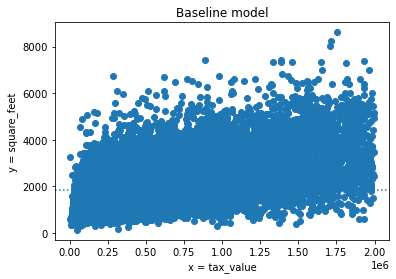

In [8]:
# plot data with baseline:

plt.scatter(x, y)
plt.axhline(y.mean(), ls = ':')
plt.xlabel('x = tax_value')
plt.ylabel('y = square_feet')
plt.title('Baseline model');

In [9]:
# Need to add a prepare.py file 
def train_validate_test_split(df, target, seed=123):
    '''
    Cleanly splits data into train, validate, and test sets.
    Takes as arguments:
    dataframe, the name of the target variable, and an integer for setting a random seed.
    Test is set to 20% of the original dataset, validate is 24% of the 
    original dataset, and train is set to 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    
    if target:
        train_validate, test = train_test_split(df, test_size=0.2, 
                                                random_state=seed, 
                                                stratify=df[target])
        train, validate = train_test_split(train_validate, test_size=0.3, 
                                           random_state=seed,
                                           stratify=train_validate[target])
    else:
        train_validate, test = train_test_split(df, test_size=0.2, 
                                                random_state=seed)
        train, validate = train_test_split(train_validate, test_size=0.3, 
                                           random_state=seed)
        
    return train, validate, test

### 2. Fit a linear regression model (ordinary least squares) and compute `yhat`, predictions of `taxvaluedollarcnt` (tax_value) using only `calfulatedfinishedsqft` (square_feet).

### 3. Modify and add to the code above as necessary for it to work with the tips dataset.

In [10]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to training data
lm.fit(df[['tax_value']], df.square_feet)

# make prediction
df['yhat'] = lm.predict(df[['tax_value']])

#drop unnecessary columns
df = df.drop(columns=['bedrooms', 'bathrooms','garage', 'pool', 'lot_size','zip', 'year_built','tax_amount', 'fed_code', 'age'])

df

,square_feet,tax_value,baseline,yhat
parcel,,,,
14297519,3100,1023282,1842.482378,2619.773539
17052889,1465,464000,1842.482378,1869.745062
14186244,1243,564778,1842.482378,2004.894003
12177905,2376,145143,1842.482378,1442.139972
12095076,2962,773303,1842.482378,2284.537704
...,...,...,...,...
11000655,1286,354621,1842.482378,1723.061699
17239384,1612,67205,1842.482378,1337.620751
12773139,1032,49546,1842.482378,1313.939043


In [11]:
### Start over with train, validate, test
train, validate, test = train_validate_test_split(df, target = None)
train.shape, validate.shape, test.shape

((28266, 4), (12115, 4), (10096, 4))

In [12]:
train["residuals"] = train.yhat - train.square_feet
train["baseline"] = train.square_feet.mean()
train["baseline_residual"] = train.baseline - train.square_feet

### 3. Plot the residuals for the linear regression model that you made.

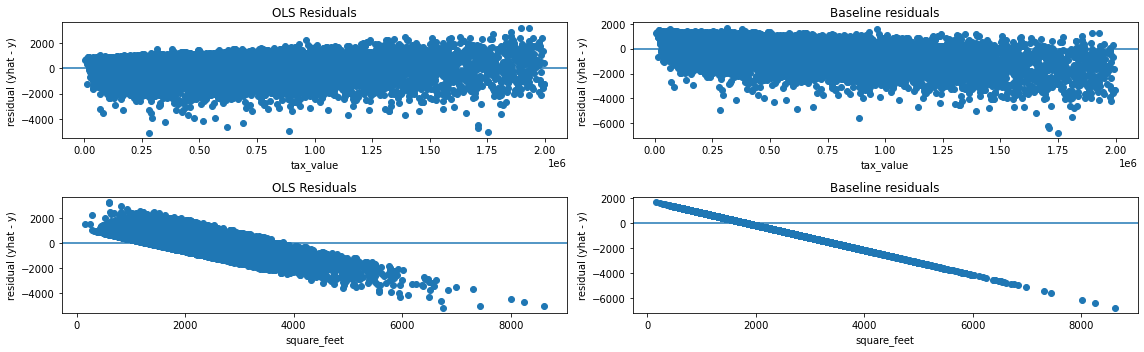

In [13]:
plt.subplots(2,2, figsize=(16,5))
plt.subplot(221)
plt.scatter(x=train.tax_value, y = train.residuals)
plt.axhline(0)
plt.xlabel('tax_value')
plt.ylabel('residual (yhat - y)')
plt.title("OLS Residuals")
plt.subplot(222)
plt.scatter(x=train.tax_value, y = train.baseline_residual)
plt.axhline(0)
plt.xlabel('tax_value')
plt.ylabel('residual (yhat - y)')
plt.title("Baseline residuals")

plt.subplot(223)
plt.scatter(x=train.square_feet, y = train.residuals)
plt.axhline(0)
plt.xlabel('square_feet')
plt.ylabel('residual (yhat - y)')
plt.title("OLS Residuals")
plt.subplot(224)
plt.scatter(x=train.square_feet, y = train.baseline_residual)
plt.axhline(0)
plt.xlabel('square_feet')
plt.ylabel('residual (yhat - y)')
plt.title("Baseline residuals")

plt.tight_layout()

In [19]:
# Values
SSE = (train.residuals**2).sum()

ESS = ((train.yhat - train.baseline)**2).sum()

# TSS = ((train.square_feet-train.baseline)**2).sum() .... OR:
TSS = SSE + ESS

MSE = SSE/len(train)

RMSE = mean_squared_error(train.square_feet, train.yhat, squared = False)

RMSE_model = MSE ** 0.5

model = {'SSE':SSE,'ESS':ESS,'TSS':TSS,'MSE':MSE, 'RMSE':RMSE_model}

In [27]:
SSE = (train.baseline_residual**2).sum()

ESS = ((train.baseline - train.baseline)**2).sum()

# TSS = ((train.tip-square_feet.baseline)**2).sum() .... OR:
TSS = SSE + ESS

MSE = SSE/len(train)

RMSE_base = MSE ** 0.5

base = {'SSE':SSE,'ESS':ESS,'TSS':TSS,'MSE':MSE, 'RMSE':RMSE_base}

In [28]:
results = pd.DataFrame(data=[model,base], index = ['model','base']).T

In [29]:
results

,model,base
SSE,1.274412e+10,1.891973e+10
ESS,6.289437e+09,0.000000e+00
TSS,1.903356e+10,1.891973e+10
MSE,4.508640e+05,6.693459e+05
RMSE,6.714641e+02,8.181356e+02


### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [30]:
#Sum of Squared Errors
SSE = (train.residuals**2).sum()
print(f' The SSE of the OLS model is {round(SSE,1)}')

 The SSE of the OLS model is 12744123185.9


In [31]:
print("Model is better than baseline (SSE is less): ", results.model.SSE<results.base.SSE)

Model is better than baseline (SSE is less):  True


In [18]:
#Mean squared error OLS:
MSE

450864.04818208376

In [20]:
# RMSE of OLS model
RMSE

671.4641078881907

In [21]:
# ESS = sum(train.yhat - train.square_feet.mean())**2
ESS

6289436878.939661

In [22]:
# Total Sum of Errors (ESS + SSE)
TSS

19033560064.85444

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [32]:
SSE_baseline = (train.baseline_residual**2).sum()
print(f' The SSE of the baseline model is {round(SSE_baseline,1)}')

 The SSE of the baseline model is 18919730214.5


In [34]:
#Mean squared error of baseline model:
MSE_baseline = SSE_baseline/len(train)
MSE_baseline

669345.8648020057

In [35]:
# RMSE for the baseline model
RMSE_baseline = mean_squared_error(train.square_feet, train.baseline, squared = False)
RMSE_baseline

818.1356029424497

### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [36]:
df_eval = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
df_eval['model_error'] = np.array([SSE,  MSE, RMSE])


df_eval

,metric,model_error
0,SSE,1.274412e+10
1,MSE,6.693459e+05
2,RMSE,6.714641e+02


In [37]:
df_eval['baseline_error'] = np.array([SSE_baseline,MSE_baseline, RMSE_baseline])

df_eval

,metric,model_error,baseline_error
0,SSE,1.274412e+10,1.891973e+10
1,MSE,6.693459e+05,6.693459e+05
2,RMSE,6.714641e+02,8.181356e+02


In [38]:
df_eval['better_than_baseline'] = df_eval.baseline_error > df_eval.model_error

In [39]:
df_eval

,metric,model_error,baseline_error,better_than_baseline
0,SSE,1.274412e+10,1.891973e+10,True
1,MSE,6.693459e+05,6.693459e+05,False
2,RMSE,6.714641e+02,8.181356e+02,True


### 7. What is the amount of variance explained in your model?

In [40]:
from sklearn.metrics import r2_score
r2_score(train.square_feet, train.yhat)

0.32641094553493566

### 8. Is your model better than the baseline model?

In [41]:
# to input on evaluate.py
def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

def r2_score(actual, predicted):
    return ess(actual, predicted) / tss(actual)

In [42]:
def regression_errors(actual, predicted):
    return pd.Series({
        'sse': sse(actual, predicted),
        'ess': ess(actual, predicted),
        'tss': tss(actual),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'sse': sse(actual, predicted),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual, predicted)
    return rmse_model < rmse_baseline

In [44]:
import math
better_than_baseline(train.square_feet, train.yhat)

True

9. Create a file named evaluate.py that contains the following functions.

- `plot_residuals(y, yhat)`: creates a residual plot
- `regression_errors(y, yhat)`: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- `baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model
- `better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise 

In [45]:
def plot_residuals(x, y, yhat):
    """ Plots residuals vs y """
    residuals = yhat - y
    
    baseline = np.full(len(y),y.mean())
    
    baseline_residuals = baseline - y
    
    plt.subplots(2,2, figsize=(16,5))
    plt.subplot(221)
    plt.scatter(x=x, y = residuals)
    plt.axhline(0)
    plt.xlabel('x')
    plt.ylabel('residual (yhat - y)')
    plt.title("OLS Residuals")
    plt.subplot(222)
    plt.scatter(x=x, y = baseline_residuals)
    plt.axhline(0)
    plt.xlabel('x')
    plt.ylabel('residual (yhat - y)')
    plt.title("Baseline residuals")

    plt.subplot(223)
    plt.scatter(x=y, y = residuals)
    plt.axhline(0)
    plt.xlabel('y')
    plt.ylabel('residual (yhat - y)')
    plt.title("OLS Residuals")
    plt.subplot(224)
    plt.scatter(x=y, y = baseline_residuals)
    plt.axhline(0)
    plt.xlabel('y')
    plt.ylabel('residual (yhat - y)')
    plt.title("Baseline residuals")

    plt.tight_layout()

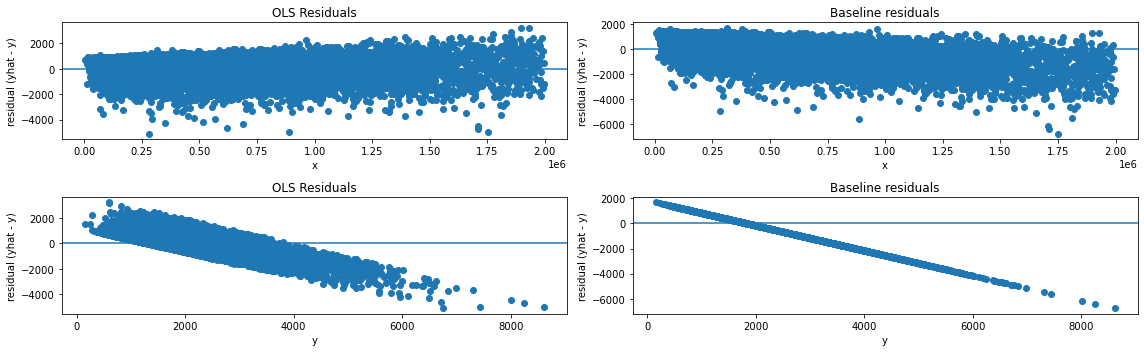

In [50]:
plot_residuals(train.tax_value, train.square_feet, train.yhat)

In [46]:
def regression_errors(y, yhat):
    """ Return error metrics for given y and yhat """
    residuals = yhat - y
    
    SSE = sum(residuals**2)

    ESS = sum((yhat - y.mean())**2)

    TSS = SSE + ESS

    MSE = mean_squared_error(y, yhat)

    RMSE = mean_squared_error(y, yhat, squared = False)
    
    R2 = r2_score(y, yhat)

    return {'SSE':SSE,'ESS':ESS,'TSS':TSS,'MSE':MSE, 'RMSE':RMSE, 'R2': R2}

In [51]:
regression_errors(train.tax_value, train.yhat)

{'SSE': 8956315465544067.0,
 'ESS': 5468686908826717.0,
 'TSS': 1.4425002374370784e+16,
 'MSE': 316858256051.2305,
 'RMSE': 562901.6397659812,
 'R2': 1.5638188498136014}

In [47]:
def baseline_mean_errors(y):
    """ Compute the SSE, MSE, and RMSE for the baseline model (mean) """
    
    baseline = np.full(len(y),y.mean())
    
    residuals = baseline - y
    
    SSE = sum(residuals**2)
    
    MSE = mean_squared_error(y, baseline)
    
    RMSE = mean_squared_error(y, baseline, squared = False)
    
    return {'SSE':SSE, 'MSE':MSE, 'RMSE':RMSE}

In [54]:
baseline_mean_errors(train.square_feet)

{'SSE': 18919730214.493507,
 'MSE': 669345.8648020057,
 'RMSE': 818.1356029424497}

In [48]:
def better_than_baseline(y, yhat):
    """ Returns True if the model performs better than baseline based on RMSE """
    
    return regression_errors(y,yhat)['RMSE'] < baseline_mean_errors(y)['RMSE']

In [55]:
better_than_baseline(train.square_feet, train.yhat)

True